In [1]:
import numpy as np
import scipy
import pandas
import treelib
import pyclust

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pandas.read_table('data/data_k5.csv', sep=',')

df.head(3)

,x,y,label
0,9.3716,-0.4233,4
1,10.1449,0.0706,4
2,-9.7006,4.7697,1


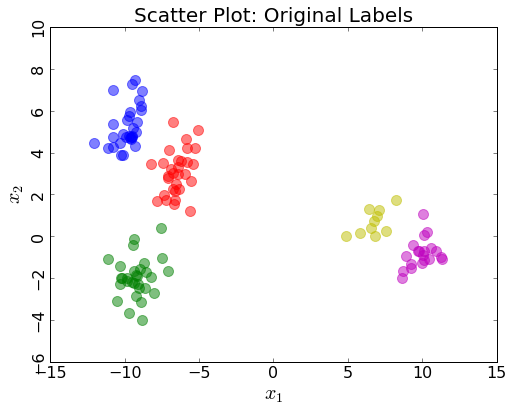

In [12]:
def plot_scatter(X, labels=None, title="Scatter Plot"):
    
    labels = np.zeros(shape=X.shape[0], dtype=int) if labels is None else labels
    colors = ['b', 'r', 'g', 'm', 'y']
    col_dict = {}
    i = 0
    for lab in np.unique(labels):
        col_dict[lab] = colors[i]
        i += 1 
    
    fig1 = plt.figure(1, figsize=(8,6))
    ax = fig1.add_subplot(1, 1, 1)

    for i in np.unique(labels):
        indx = np.where(labels == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

    plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(title, size=20)

    plt.show()
    
## test plot original data
plot_scatter(df.iloc[:,0:2].values, labels=df.iloc[:,2].values, title="Scatter Plot: Original Labels")

### KMeans Clustering

** K = 5**

[[-9.48510303  5.2449    ]
 [ 9.94503684 -0.92278421]
 [ 7.01883636  0.71122727]
 [-6.55965185  2.83834074]
 [-9.19285333 -1.96296667]]


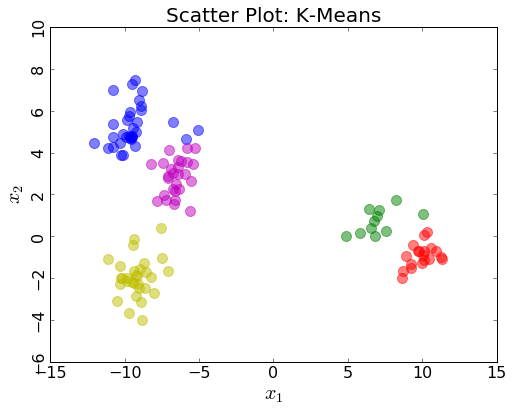

In [15]:
km = pyclust.KMeans(n_clusters=5)

km.fit(df.iloc[:,0:2].values)

print(km.centers_)

plot_scatter(df.iloc[:,0:2].values, labels=km.labels_, title="Scatter Plot: K-Means")

## Bisecting K-Means

[7 7 5 5 8 5 6 5 6 5 5 1 5 6 6 7 6 5 5 5 7 5 1 1 6 1 1 1 8 8 1 7 1 7 5 7 6
 7 1 6 1 6 6 8 1 5 6 7 6 7 7 5 6 8 1 1 5 8 7 7 1 1 5 5 7 5 5 6 1 8 1 5 6 7
 1 5 5 1 5 1 1 6 1 1 6 1 5 5 6 5 1 6 5 6 6 1 7 8 6 1 6 7 5 6 6 5 6 1 7 8 8
 6 5 1 8 6 6 5 7 1]


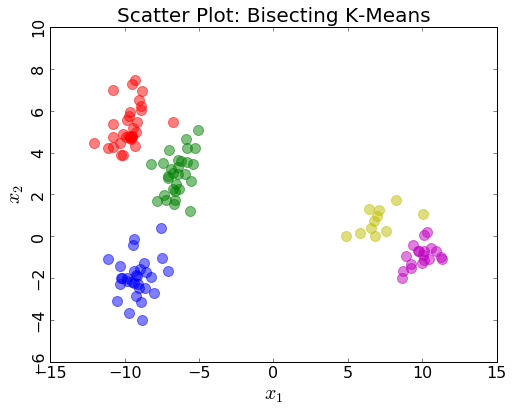

In [16]:
bkm = pyclust.BisectKMeans(n_clusters=5)

bkm.fit(df.iloc[:,0:2].values)

print(bkm.labels_)

plot_scatter(df.iloc[:,0:2].values, labels=bkm.labels_, title="Scatter Plot: Bisecting K-Means")

In [17]:
bkm.tree_.show(line_type='ascii')

0
|-- 1
+-- 2
    |-- 3
    |   |-- 7
    |   +-- 8
    +-- 4
        |-- 5
        +-- 6



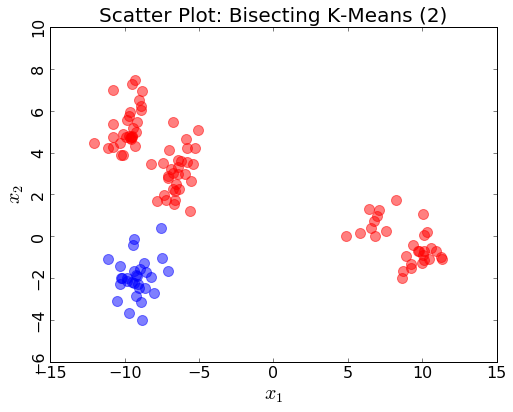

In [18]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(2), title="Scatter Plot: Bisecting K-Means (2)")

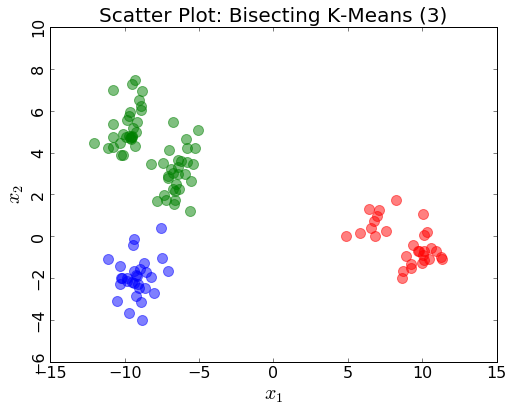

In [19]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(3), title="Scatter Plot: Bisecting K-Means (3)")

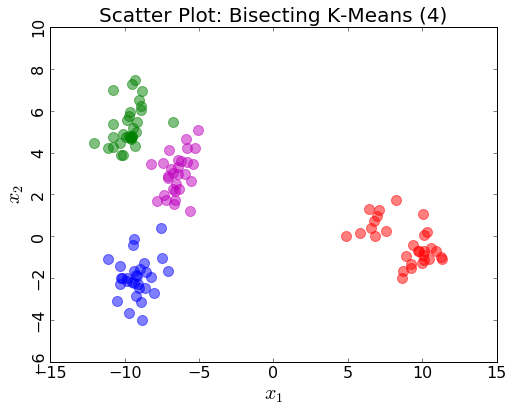

In [20]:
plot_scatter(df.iloc[:,0:2].values, labels=bkm.cut(4), title="Scatter Plot: Bisecting K-Means (4)")

In [21]:
bkm.cut(3)

array([3, 3, 4, 4, 3, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 1,
       1, 4, 1, 1, 1, 3, 3, 1, 3, 1, 3, 4, 3, 4, 3, 1, 4, 1, 4, 4, 3, 1, 4,
       4, 3, 4, 3, 3, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 1, 4, 4, 3, 4, 4, 4, 1,
       3, 1, 4, 4, 3, 1, 4, 4, 1, 4, 1, 1, 4, 1, 1, 4, 1, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 1, 3, 3, 4, 1, 4, 3, 4, 4, 4, 4, 4, 1, 3, 3, 3, 4, 4, 1, 3,
       4, 4, 4, 3, 1])